In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset_B_05_2020.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
data

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Separated the features and the target variable
X = data.drop(columns=['url','status'])
y = data['status']

In [ ]:
#X['TLD'] = LabelEncoder().fit_transform(X['TLD'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialized models for ensemble learning
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}


In [ ]:
# Trained the models and collected feature importances across all
feature_importances = np.zeros(X_train.shape[1])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        feature_importances += model.feature_importances_

In [ ]:
# Average the feature importances and saved
average_feature_importances = feature_importances / len(models)


In [ ]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': average_feature_importances
}).sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
85,google_index,0.428938
86,page_rank,0.112088
56,nb_hyperlinks,0.089183
83,web_traffic,0.042248
20,nb_www,0.032041
...,...,...
59,ratio_nullHyperlinks,0.000000
63,ratio_intErrors,0.000000
61,ratio_intRedirection,0.000000
18,nb_dollar,0.000000


In [ ]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature']

In [ ]:
selected_features

,Feature
85,google_index
86,page_rank
56,nb_hyperlinks
83,web_traffic
20,nb_www
...,...
76,right_clic
52,brand_in_subdomain
16,nb_comma
38,nb_external_redirection


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X_selected = X[selected_features]

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Apply mutual_info_classif
mutual_info = mutual_info_classif(X_selected, y)

# Create a DataFrame to display mutual information scores
mutual_info_df = pd.DataFrame({
    'Feature': selected_features,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

# Display the mutual information scores
print(mutual_info_df)

                Feature  Mutual Information
83          web_traffic            0.300489
85         google_index            0.299844
82           domain_age            0.278138
57  ratio_intHyperlinks            0.240490
58  ratio_extHyperlinks            0.239095
..                  ...                 ...
34        random_domain            0.000000
75          onmouseover            0.000000
28                 port            0.000000
31   abnormal_subdomain            0.000000
16             nb_comma            0.000000

[78 rows x 2 columns]


In [ ]:


# Calculating the cumulative sum of the mutual information scores
mutual_info_df['Cumulative Sum'] = mutual_info_df['Mutual Information'].cumsum()

# Calculating the threshold for 85% of the total sum
threshold = 0.85 * mutual_info_df['Mutual Information'].sum()

# Selected the top 85% of features based on the cumulative sum
top_85_percent_features = mutual_info_df[mutual_info_df['Cumulative Sum'] <= threshold]

print(top_85_percent_features)

                       Feature  Mutual Information  Cumulative Sum
83                 web_traffic            0.300489        0.300489
85                google_index            0.299844        0.600333
82                  domain_age            0.278138        0.878471
57         ratio_intHyperlinks            0.240490        1.118961
58         ratio_extHyperlinks            0.239095        1.358056
56               nb_hyperlinks            0.231732        1.589787
86                   page_rank            0.214587        1.804374
74                 safe_anchor            0.178422        1.982797
81  domain_registration_length            0.151553        2.134350
62        ratio_extRedirection            0.123195        2.257545
67               links_in_tags            0.114107        2.371652
46           longest_word_path            0.108163        2.479815
20                      nb_www            0.103817        2.583632
25            ratio_digits_url            0.103107        2.68

In [ ]:
top_85_percent_feature_names = top_85_percent_features['Feature'].tolist()

In [ ]:
final_data = data[top_85_percent_feature_names]

In [ ]:
final_data

,web_traffic,google_index,domain_age,ratio_intHyperlinks,ratio_extHyperlinks,nb_hyperlinks,page_rank,safe_anchor,domain_registration_length,ratio_extRedirection,...,shortest_word_host,char_repeat,phish_hints,length_url,ratio_intMedia,avg_words_raw,length_hostname,ratio_extMedia,nb_dots,domain_in_title
0,0,1,-1,0.529412,0.470588,17,4,0.000000,45,0.875000,...,3,4,0,37,100.000000,5.750000,19,0.000000,3,0
1,0,1,5767,0.966667,0.033333,30,2,100.000000,77,0.000000,...,19,4,0,77,80.000000,15.750000,23,20.000000,1,1
2,5828815,1,4004,1.000000,0.000000,4,0,100.000000,14,0.000000,...,3,2,0,126,0.000000,8.250000,50,0.000000,4,1
3,107721,0,-1,0.973154,0.026846,149,3,62.500000,62,0.250000,...,5,0,0,18,96.428571,5.000000,11,3.571429,2,1
4,8725,0,8175,0.470588,0.529412,102,6,0.000000,224,0.537037,...,3,3,0,55,0.000000,6.333333,15,100.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,3980,0,5396,0.884422,0.115578,199,6,0.000000,448,0.043478,...,3,4,0,45,21.052632,7.750000,17,78.947368,2,0
11426,0,1,6728,1.000000,0.000000,3,0,0.000000,211,0.000000,...,3,3,0,84,0.000000,5.166667,18,0.000000,5,1
11427,8,1,8515,0.470588,0.529412,68,10,80.000000,2809,0.000000,...,3,5,0,105,0.000000,6.153846,16,0.000000,2,0
11428,2455493,0,2836,0.375000,0.625000,32,4,0.000000,85,0.050000,...,3,3,0,38,0.000000,12.500000,30,100.000000,2,1


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   web_traffic                 11430 non-null  int64  
 1   google_index                11430 non-null  int64  
 2   domain_age                  11430 non-null  int64  
 3   ratio_intHyperlinks         11430 non-null  float64
 4   ratio_extHyperlinks         11430 non-null  float64
 5   nb_hyperlinks               11430 non-null  int64  
 6   page_rank                   11430 non-null  int64  
 7   safe_anchor                 11430 non-null  float64
 8   domain_registration_length  11430 non-null  int64  
 9   ratio_extRedirection        11430 non-null  float64
 10  links_in_tags               11430 non-null  float64
 11  longest_word_path           11430 non-null  int64  
 12  nb_www                      11430 non-null  int64  
 13  ratio_digits_url            114

In [ ]:
X_url_embeddings = pd.read_csv('/content/drive/MyDrive/url_embeds_cls.csv')

In [ ]:
X_url_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.469255,-0.405063,0.594913,0.136169,1.582099,-0.483576,0.906208,0.477526,-0.098015,-0.107252,...,0.363200,-0.109043,0.342846,-0.361950,-0.598929,-0.735178,-1.054563,-0.674291,-0.461370,0.044902
1,-0.000928,0.443874,-0.260562,-0.043517,-0.359301,-1.166746,-0.269019,0.111335,0.194590,0.226820,...,0.642944,1.135552,0.104530,0.353447,0.943881,0.600342,1.264430,0.774515,0.062177,0.365771
2,0.167460,0.417528,-0.309965,0.165192,-0.416369,-0.876358,-0.390015,0.086102,0.215878,-0.117253,...,0.549449,0.894037,0.087685,0.188817,0.973427,0.550444,1.179196,0.731847,0.071046,0.090249
3,0.240991,-0.106745,-0.302739,-0.082323,0.747177,-1.286825,0.320509,0.101059,-0.149785,0.566305,...,0.241587,0.056352,0.055448,-0.677768,-0.464772,-0.006799,0.942901,0.476825,-0.227417,0.045641
4,-0.431422,-0.561046,0.177919,-0.464770,1.618210,-0.069161,0.762422,0.302574,-0.566404,0.510891,...,-0.091749,-0.246647,0.013819,-0.423208,-0.558926,-1.015461,-0.778710,-0.900499,-0.059679,-0.576099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,-0.182000,-0.053915,-0.067035,-0.448839,1.083498,0.433607,0.765216,0.368842,-0.918494,0.646444,...,0.211888,-0.308620,0.009435,-0.363927,-0.550364,-0.704651,-0.387404,-0.948580,-0.544716,-0.106422
11426,0.062821,0.583424,-0.066244,-0.226712,-0.395024,-0.883466,-0.755481,-0.071679,0.059975,-0.055863,...,0.764650,0.932202,-0.002972,-0.406380,0.625217,0.360301,0.753569,0.288807,0.197133,0.285982
11427,-0.156803,-0.550709,0.352618,-0.124216,1.139558,0.418037,0.768503,0.175868,-0.789776,0.913601,...,0.318785,-0.211856,0.258788,-0.539019,-0.595462,-0.485886,-0.682009,-0.925361,-0.418217,-0.189013
11428,0.011372,-0.347634,-0.045246,-0.456263,1.409382,0.078471,1.003762,0.528138,-0.822833,0.607301,...,0.168471,-0.117611,0.043892,-0.797820,-0.565127,-0.993448,-0.424178,-0.775399,-0.401752,-0.045945


In [ ]:
other_features = final_data.values  # Convert final_data DataFrame to NumPy array

In [ ]:
# shapes of the arrays to identify the mismatch
print("Shape of URL embeddings:", X_url_embeddings.shape)
print("Shape of other features:", other_features.shape)

Shape of URL embeddings: (11430, 768)
Shape of other features: (11430, 28)


In [ ]:
X_combined = np.hstack((X_url_embeddings, other_features))

In [ ]:
X_combined

array([[-4.6925510e-01, -4.0506280e-01,  5.9491320e-01, ...,
         0.0000000e+00,  3.0000000e+00,  0.0000000e+00],
       [-9.2816283e-04,  4.4387418e-01, -2.6056173e-01, ...,
         2.0000000e+01,  1.0000000e+00,  1.0000000e+00],
       [ 1.6745986e-01,  4.1752756e-01, -3.0996487e-01, ...,
         0.0000000e+00,  4.0000000e+00,  1.0000000e+00],
       ...,
       [-1.5680337e-01, -5.5070910e-01,  3.5261843e-01, ...,
         0.0000000e+00,  2.0000000e+00,  0.0000000e+00],
       [ 1.1372247e-02, -3.4763414e-01, -4.5245770e-02, ...,
         1.0000000e+02,  2.0000000e+00,  1.0000000e+00],
       [ 2.2567196e-02,  3.3731976e-01, -2.2446713e-01, ...,
         0.0000000e+00,  2.4000000e+01,  1.0000000e+00]])

In [ ]:
#X_combined.columns = X_combined.columns.astype(str)

In [ ]:
X=X_combined
y=data['status']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')  # Path to save the scaler

In [ ]:
from tensorflow.keras.regularizers import l2


In [ ]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0458 - val_accuracy: 0.9694 - val_loss: 0.1661
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0146 - val_accuracy: 0.9691 - val_loss: 0.1289
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0126 - val_accuracy: 0.9688 - val_loss: 0.1640
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0095 - val_accuracy: 0.9659 - val_loss: 0.2079
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9962 - loss: 0.0146 - val_accuracy: 0.9700 - val_loss: 0.1787
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9697 - val_loss: 0.1871
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0059 - val_accuracy: 0.9694 - val_loss: 0.2032


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.1653
Test Accuracy: 0.9691


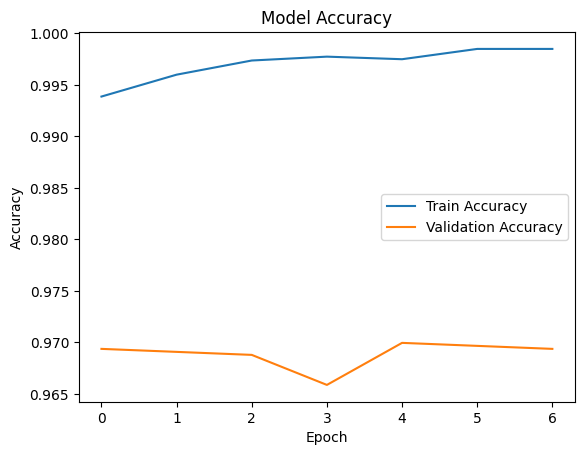

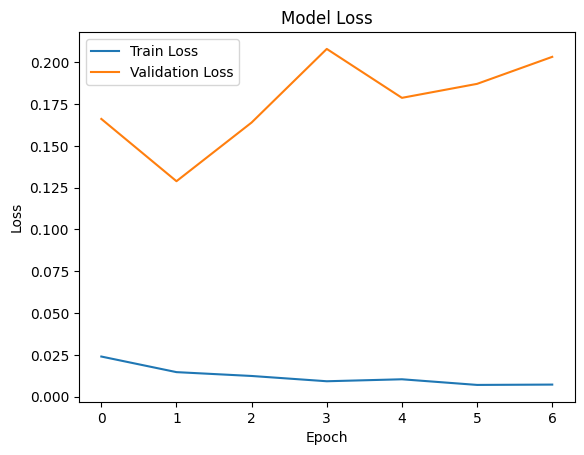

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/ANN.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1684   48]
 [  58 1639]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



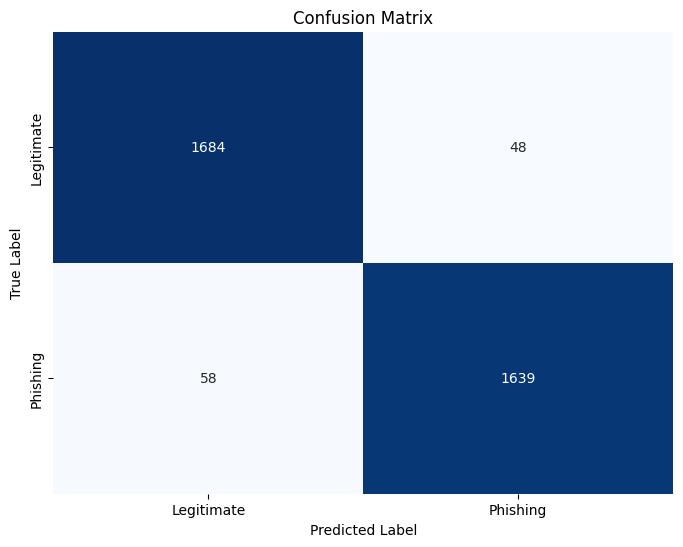

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9703


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8063575386410032


In [ ]:
from sklearn.svm import SVC

# Support Vector Classifier (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5914260717410323
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.73      0.31      0.43      1732
           1       0.55      0.88      0.68      1697

    accuracy                           0.59      3429
   macro avg       0.64      0.59      0.56      3429
weighted avg       0.64      0.59      0.55      3429



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Evaluate
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report for Gradient Boosting Classifier:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Accuracy: 0.9693788276465442
Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Convert the data into DMatrix, the format XGBoost prefers
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Define the tuned hyperparameters
params = {
    'objective': 'binary:logistic',  # Binary classification task
    'eval_metric': 'logloss',        # Evaluation metric: logloss for binary classification
    'eta': 0.01,                     # Lower learning rate for better generalization
    'max_depth': 5,                  # Moderate depth to prevent overfitting
    'min_child_weight': 5,           # Control overfitting by requiring more data points in leaf nodes
    'subsample': 0.8,                # Used 80% of the data for each tree (to reduce overfitting)
    'colsample_bytree': 0.7,         # Used 70% of the features for each tree (to reduce overfitting)
    'lambda': 2,                     # L2 regularization to control overfitting
    'alpha': 0.5,                    # L1 regularization to improve generalization
    'gamma': 0.2,                    # Minimum loss reduction to make a further split
    'seed': 42                       # For reproducibility
}


In [ ]:
evals = [(dtrain, 'train'), (dtest, 'validation')]

In [ ]:
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,              # Max number of boosting rounds
    evals=evals,
    early_stopping_rounds=10,         # EarlyStop if validation loss doesn't improve after 10 rounds
    verbose_eval=True
)

[0]	train-logloss:0.68336	validation-logloss:0.68396
[1]	train-logloss:0.67379	validation-logloss:0.67489
[2]	train-logloss:0.66440	validation-logloss:0.66601
[3]	train-logloss:0.65519	validation-logloss:0.65730
[4]	train-logloss:0.64616	validation-logloss:0.64882
[5]	train-logloss:0.63730	validation-logloss:0.64046
[6]	train-logloss:0.62861	validation-logloss:0.63228
[7]	train-logloss:0.62008	validation-logloss:0.62424
[8]	train-logloss:0.61171	validation-logloss:0.61638
[9]	train-logloss:0.60349	validation-logloss:0.60866
[10]	train-logloss:0.59543	validation-logloss:0.60106
[11]	train-logloss:0.58751	validation-logloss:0.59357
[12]	train-logloss:0.57971	validation-logloss:0.58625
[13]	train-logloss:0.57205	validation-logloss:0.57902
[14]	train-logloss:0.56454	validation-logloss:0.57194
[15]	train-logloss:0.55716	validation-logloss:0.56502
[16]	train-logloss:0.54991	validation-logloss:0.55825
[17]	train-logloss:0.54279	validation-logloss:0.55157
[18]	train-logloss:0.53579	validation-

In [ ]:

y_pred_proba = xgb_model.predict(xgb.DMatrix(X_test))
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9679


In [ ]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9679206765820939
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1732
           1       0.97      0.97      0.97      1697

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



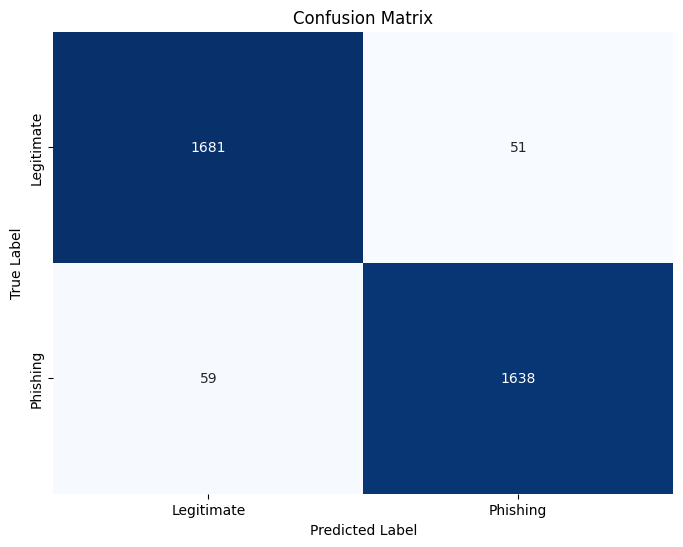

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()